In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np

### LOAD DATASET

In [3]:
dataset=pd.read_csv('spotify_2010.csv')
dataset.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1


In [4]:
# Copying the data as we are modifying the data this should not change the real data
data=dataset.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6398 entries, 0 to 6397
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             6398 non-null   object 
 1   artist            6398 non-null   object 
 2   uri               6398 non-null   object 
 3   danceability      6398 non-null   float64
 4   energy            6398 non-null   float64
 5   key               6398 non-null   int64  
 6   loudness          6398 non-null   float64
 7   mode              6398 non-null   int64  
 8   speechiness       6398 non-null   float64
 9   acousticness      6398 non-null   float64
 10  instrumentalness  6398 non-null   float64
 11  liveness          6398 non-null   float64
 12  valence           6398 non-null   float64
 13  tempo             6398 non-null   float64
 14  duration_ms       6398 non-null   int64  
 15  time_signature    6398 non-null   int64  
 16  chorus_hit        6398 non-null   float64


### Top artists

In [13]:
#np.unique(data['artist']).shape[0]
value_count=pd.DataFrame(data['artist'].value_counts().head(10))
value_count.style.background_gradient(cmap='hot')

,artist
Drake,50
Glee Cast,41
Taylor Swift,35
Luke Bryan,25
Johann Sebastian Bach,25
The Weeknd,24
Post Malone,23
Hiphop Tamizha,23
Alexandre Desplat,22
Jason Aldean,22


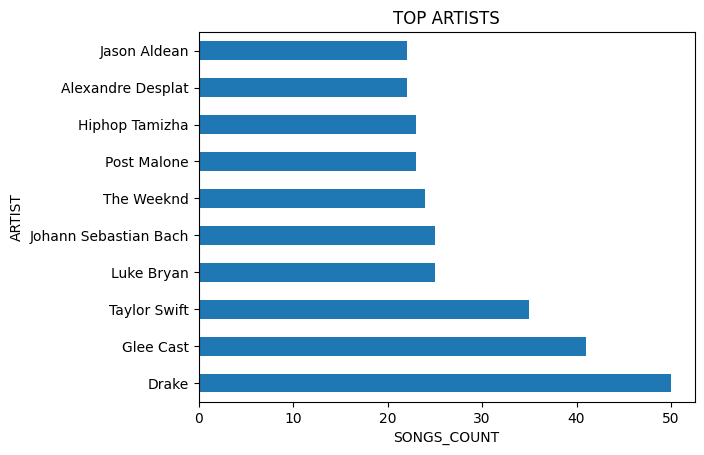

In [17]:
import matplotlib.pyplot as plt
plt.figure()
data['artist'].value_counts().head(10).plot(kind='barh')
plt.title('TOP ARTISTS')
plt.xlabel('SONGS_COUNT')
plt.ylabel('ARTIST')
plt.show()

### Preprocess the data

In [4]:
# Shuffling the data (pandas sample-- frac:what fraction of data will return)
data=data.sample(frac=1,random_state=44)
data.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
2586,Saraswati,Arve Henriksen,spotify:track:2YO3h8ND0gaSf56ncGrPsK,0.212,0.311,6,-14.758,1,0.0369,0.919000,0.917000,0.1060,0.151,77.592,268592,3,46.21000,16,0
1598,Wild Child,Kenny Chesney With Grace Potter,spotify:track:050iNgNKEUrJboOnH4Jhm6,0.586,0.633,3,-7.688,1,0.0318,0.475000,0.000004,0.1640,0.445,148.984,189800,4,39.25637,8,1
5591,You're Mine,Carpenter Brut,spotify:track:1uAnBm1hMBWkIFdRwXfCOK,0.449,0.984,5,-4.879,0,0.0796,0.000006,0.951000,0.2430,0.397,142.028,378592,4,27.89992,18,0
3152,From the Flames,Memoriam,spotify:track:5JTv4wEgiXw6vL6OR3WJKm,0.525,0.602,6,-15.015,1,0.0466,0.002470,0.572000,0.1040,0.146,80.057,339493,4,46.31089,12,0
180,"Hooray, It's L.A.",Blindside,spotify:track:3fMQTuh34J7oRsKFp73Tja,0.492,0.922,11,-4.000,0,0.0402,0.000024,0.000000,0.0443,0.540,146.015,197707,4,35.02745,8,0


In [5]:
#Droping the uneffective predictors
data=data.drop(['track','artist','uri'],axis=1)
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
2586,0.212,0.311,6,-14.758,1,0.0369,0.919000,0.917000,0.1060,0.151,77.592,268592,3,46.21000,16,0
1598,0.586,0.633,3,-7.688,1,0.0318,0.475000,0.000004,0.1640,0.445,148.984,189800,4,39.25637,8,1
5591,0.449,0.984,5,-4.879,0,0.0796,0.000006,0.951000,0.2430,0.397,142.028,378592,4,27.89992,18,0
3152,0.525,0.602,6,-15.015,1,0.0466,0.002470,0.572000,0.1040,0.146,80.057,339493,4,46.31089,12,0
180,0.492,0.922,11,-4.000,0,0.0402,0.000024,0.000000,0.0443,0.540,146.015,197707,4,35.02745,8,0


In [6]:
data.columns.values

array(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'chorus_hit', 'sections',
       'target'], dtype=object)

In [7]:
#Creating the input and target data and scale the input data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
input_columns=['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'chorus_hit', 'sections']
input_data=pd.DataFrame(data.iloc[:,:-1],columns=input_columns)
target_data=pd.DataFrame(data.iloc[:,-1],columns=['target'])
scaler.fit(input_data)
input_data=pd.DataFrame(scaler.transform(input_data),columns=input_columns)
input_data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections
0,-1.863872,-1.482146,0.198693,-1.369498,0.741048,-0.628681,2.365376,2.358586,-0.545938,-1.191156,-1.499809,0.372389,-2.466395,0.264809,1.505276
1,0.093346,-0.144396,-0.633269,-0.018762,0.741048,-0.681141,0.869479,-0.518615,-0.196825,0.005150,0.892279,-0.547753,0.183033,-0.090561,-0.613527
2,-0.623603,1.313835,-0.078628,0.517902,-1.349440,-0.189456,-0.730841,2.465265,0.278690,-0.190165,0.659209,1.656981,0.183033,-0.670940,2.034977
3,-0.225880,-0.273185,0.198693,-1.418598,0.741048,-0.528904,-0.722540,1.276100,-0.557976,-1.211501,-1.417215,1.200379,0.183033,0.269965,0.445874
4,-0.398575,1.056256,1.585296,0.685837,-1.349440,-0.594736,-0.730782,-0.518629,-0.917321,0.391712,0.792799,-0.455414,0.183033,-0.306683,-0.613527


In [8]:
#Creating the train, validation and test data from the input and target data
#VLAIDATION DATA: for observing the overfitting by the hyper-parameters(parameters choose by the programer to create the model)

#initialise the number of rows that will be in the train ,test and validation set
train_count=int(0.8*input_data.shape[0])
vald_count=int(0.1*input_data.shape[0])
test_count=input_data.shape[0]-train_count-vald_count

train_input=input_data.iloc[:train_count,:]              #loc:label based(identifys by feature names), iloc identifies as index numbers
train_target=target_data.iloc[:train_count,:]            #loc and iloc are from pandas
vald_input=input_data.iloc[train_count:train_count+vald_count,:]
vald_target=target_data.iloc[train_count:train_count+vald_count,:]
test_input=input_data.iloc[train_count+vald_count:,:]
test_target=target_data.iloc[train_count+vald_count:,:]
test_target

print(train_count,vald_count,test_count)
#Check the balance in the target data in train, test and the validation set
print(np.sum(train_target['target'])/train_count,np.sum(vald_target['target'])/vald_count,np.sum(test_target['target'])/test_count)

5118 639 641
0.4976553341148886 0.5007824726134585 0.5179407176287052


### Save the preprocessed data

In [9]:
#Saving the train ,test, validation data in npz format
np.savez('spotify_train_data',inputs=train_input,targets=train_target)
np.savez('spotify_validation_data',inputs=vald_input,targets=vald_target)
np.savez('spotify_test_data',inputs=test_input,targets=test_target)

### LOAD the preprocessed data

In [10]:
npz=np.load('spotify_train_data.npz')
train_input,train_target=npz['inputs'],npz['targets']
npz=np.load('spotify_validation_data.npz')
vald_input,vald_target=npz['inputs'],npz['targets']
npz=np.load('spotify_test_data.npz')
test_input,test_target=npz['inputs'],npz['targets']

### CREATE A  MODEL by DEEP LEARNING ALGORITHM

In [13]:
hid_size=100   #initialising the the size of each hidden layers 
model=tf.keras.Sequential([
    tf.keras.layers.Dense(hid_size,activation='relu'),
    tf.keras.layers.Dense(hid_size,activation='relu'),
    tf.keras.layers.Dense(2,activation='softmax'),
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
batch_size=100
epoch=30
early_stopping=tf.keras.callbacks.EarlyStopping(patience=2)  #patience is the maximum number of ignoring(by default 0)
model.fit(train_input,train_target,batch_size=batch_size,epochs=epoch,
          callbacks=[early_stopping],     #calling a callback eraly stopping in each epochs
          validation_data=(vald_input,vald_target),verbose=2)

Epoch 1/30
52/52 - 1s - loss: 0.5076 - accuracy: 0.7440 - val_loss: 0.4367 - val_accuracy: 0.8059 - 1s/epoch - 23ms/step
Epoch 2/30
52/52 - 0s - loss: 0.4074 - accuracy: 0.8183 - val_loss: 0.4011 - val_accuracy: 0.8138 - 111ms/epoch - 2ms/step
Epoch 3/30
52/52 - 0s - loss: 0.3873 - accuracy: 0.8251 - val_loss: 0.4057 - val_accuracy: 0.8122 - 119ms/epoch - 2ms/step
Epoch 4/30
52/52 - 0s - loss: 0.3756 - accuracy: 0.8281 - val_loss: 0.4052 - val_accuracy: 0.8247 - 116ms/epoch - 2ms/step


### Apply the model to the test data

In [14]:
#if we are getting high test accuracy than the vildation accuracy, it is just the luck
model.evaluate(test_input,test_target)

21/21 [==============================] - 0s 2ms/step - loss: 0.4329 - accuracy: 0.7925


[0.43293696641921997, 0.7925117015838623]